In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    # for filename in filenames:
        # print(os.path.join(dirname, filename))
    # print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
!pip install ruamel.yaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 18.7 MB/s eta 0:00:00


In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
import sys
import ruamel.yaml
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("cubeai/trash-detection-for-yolov8")

print("Path to dataset files:", dataset_path)

100%|██████████| 232M/232M [00:02<00:00, 114MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cubeai/trash-detection-for-yolov8/versions/1


In [ ]:
image = cv2.imread(dataset_path+"/train/images/000000_JPG_jpg.rf.0c1d3ad769060ea39a27c74edac0375f.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


In [ ]:
model = YOLO("yolo12s.pt")

100%|██████████| 18.1M/18.1M [00:00<00:00, 143MB/s]


In [ ]:
image = dataset_path + "/train/images/000000_JPG_jpg.rf.491add31a48b80edf51510f8fad3ea81.jpg"
result_predict = model.predict(source = image, imgsz=(640))


image 1/1 /root/.cache/kagglehub/datasets/cubeai/trash-detection-for-yolov8/versions/1/train/images/000000_JPG_jpg.rf.491add31a48b80edf51510f8fad3ea81.jpg: 640x640 (no detections), 876.7ms
Speed: 24.4ms preprocess, 876.7ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 640)


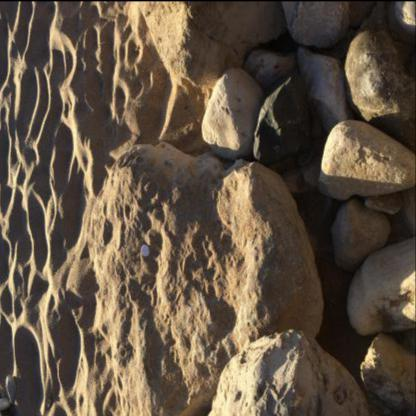

In [ ]:
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
path = dataset_path

In [ ]:
yaml = ruamel.yaml.YAML()
# yaml.preserve_quotes = True
with open(dataset_path + "/data.yaml") as fp:
    data = yaml.load(fp)

In [ ]:
data['path'] = path
data['names'] = ['Алюминиевая фольга', 'Крышки от бутылок', 'Бутылки', 'Битое стекло', 'Банки', 'Картонные коробки', 'Сигареты', 'Стаканчики', 'Крышки', 'Другой мусор', 'Другой пластик', 'Бумага', 'Пластиковая упаковка для пакетов', 'Пластиковые контейнеры', 'Этикетки для попкорна', 'Соломинки', 'Листы пенополистирола', 'Немаркированный мусор']

In [ ]:
print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 18, 'names': ['Алюминиевая фольга', 'Крышки от бутылок', 'Бутылки', 'Битое стекло', 'Банки', 'Картонные коробки', 'Сигареты', 'Стаканчики', 'Крышки', 'Другой мусор', 'Другой пластик', 'Бумага', 'Пластиковая упаковка для пакетов', 'Пластиковые контейнеры', 'Этикетки для попкорна', 'Соломинки', 'Листы пенополистирола', 'Немаркированный мусор'], 'path': '/root/.cache/kagglehub/datasets/cubeai/trash-detection-for-yolov8/versions/1'}


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
with open("data1.yaml", "w") as f:
    yaml.dump(data, f)

In [ ]:
print(os.getcwd())

/content


In [ ]:
Final_model = YOLO('yolo12s.yaml').load('yolo12s.pt')

Transferred 691/691 items from pretrained weights


In [ ]:
Result_Final_model = Final_model.train(
    data="data1.yaml",
    epochs=90,
    imgsz=640,
    batch=16,
    # lr0=0.005,
    dropout=0.15,  # Для YOLO dropout задаётся в архитектуре модели, а не здесь
    # device='cpu',      # Должно быть строкой
    # optimizer='AdamW',  # Указывается строкой
    # Добавьте параметры для ускорения:
    # cache='ram',     # Кэширование данных
    # workers=4,       # Оптимально для Kaggle
    # close_mosaic=10, # Ускоряет обучение
    # pretrained=True  # Если используете предобученные веса
)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo12s.yaml, data=data1.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo12s.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, for

100%|██████████| 22.2M/22.2M [00:00<00:00, 156MB/s] 


Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytic

train: Scanning /root/.cache/kagglehub/datasets/cubeai/trash-detection-for-yolov8/versions/1/train/labels... 4200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4200/4200 [00:02<00:00, 1795.69it/s]


train: New cache created: /root/.cache/kagglehub/datasets/cubeai/trash-detection-for-yolov8/versions/1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 911.7±459.0 MB/s, size: 35.4 KB)


val: Scanning /root/.cache/kagglehub/datasets/cubeai/trash-detection-for-yolov8/versions/1/valid/labels... 1704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:00<00:00, 1902.65it/s]


val: New cache created: /root/.cache/kagglehub/datasets/cubeai/trash-detection-for-yolov8/versions/1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.646      6.627      1.373         83        640:   0%|          | 1/263 [01:02<4:34:14, 62.80s/it]


100%|██████████| 755k/755k [00:00<00:00, 12.7MB/s]


In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

for i in list_of_metrics:
    img = cv2.imread(f"runs/detect/train/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [ ]:
Valid_model = YOLO('runs/detect/train/weights/best.pt')

In [ ]:
# Valid_model = YOLO('/kaggle/input/fire-smoke-weights/fire_smoke_params_yolo12s.pt')

In [ ]:
metrics = Valid_model.val(split = 'val')

In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

In [ ]:
images = os.listdir(dataset_path + "/test/images")
for i in range(5, 15):
    image = os.path.join(dataset_path + "/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))